In [17]:
import os
import pandas as pd
from project.model import get_inputs
from project.utils import cumulated_plot, cumulated_plots


- General description
- Annual consumption
- thermal resistence
- cost curves and mac curves

In [20]:
path = 'output/static'
if not os.path.isdir(path):
    os.mkdir(path)

inputs = get_inputs(path)
buildings = inputs['buildings']


2022-11-23 14:33:55,275 - 16400 - log_static - INFO - Creating AgentBuildings object
2022-11-23 14:33:55,275 - 16400 - log_static - INFO - Creating AgentBuildings object


In [21]:
profeel = pd.read_csv('building_stock_profeel_detailed.csv', index_col=['Class', 'Housing type', 'Wall', 'Floor', 'Roof', 'Windows'])
profeel = profeel[profeel['Heating system'] != 'RCU']

In [26]:
#profeel = get_inputs(building_stock='building_stock_profeel_detailed.csv')

TypeError: the 'package' argument is required to perform a relative import for '.'

## Thermal transmittance description

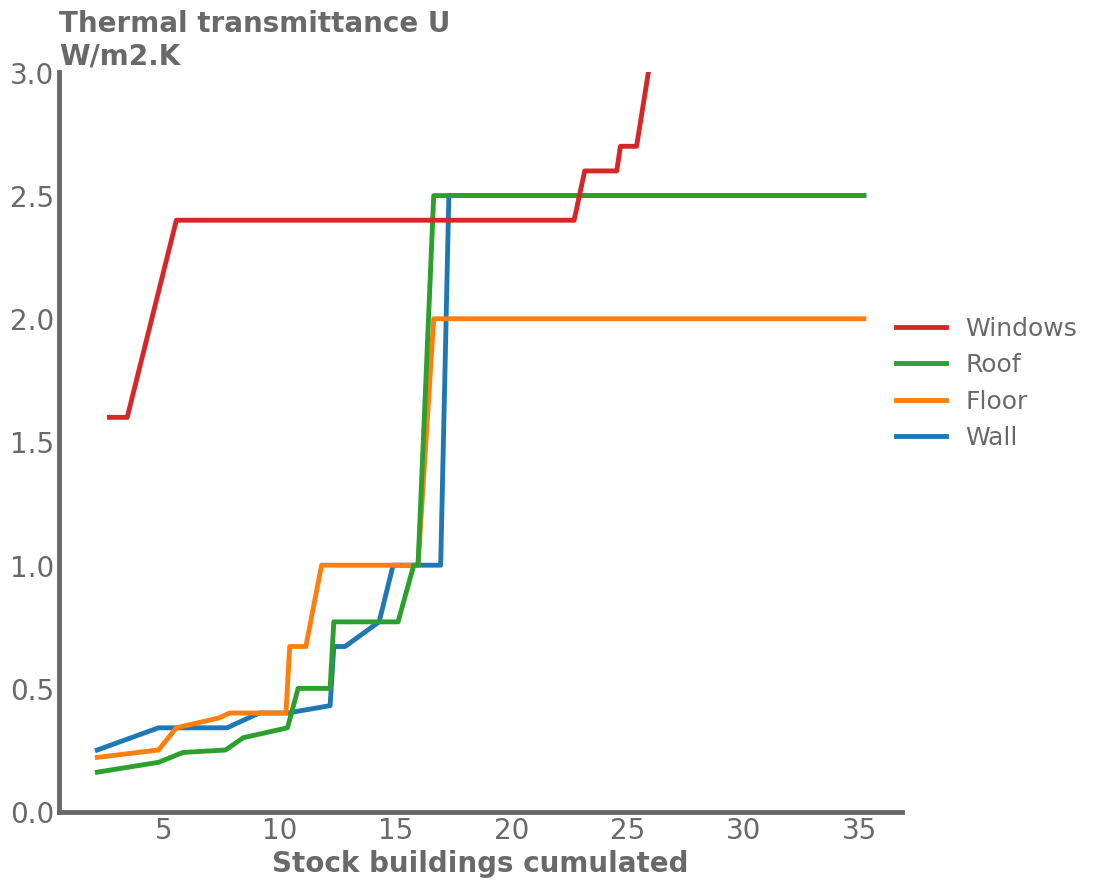

In [22]:
temp = dict()
for i in ['Wall', 'Floor', 'Roof', 'Windows']:
    y = pd.Series(profeel.index.get_level_values(i), index=profeel.index,
               name='{} insulation (W/m2.K)'.format(i)).astype('float')
    x = profeel['Stock buildings'] / 10 ** 6
    temp.update({i: cumulated_plot(x, y, plot=False)})

cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)

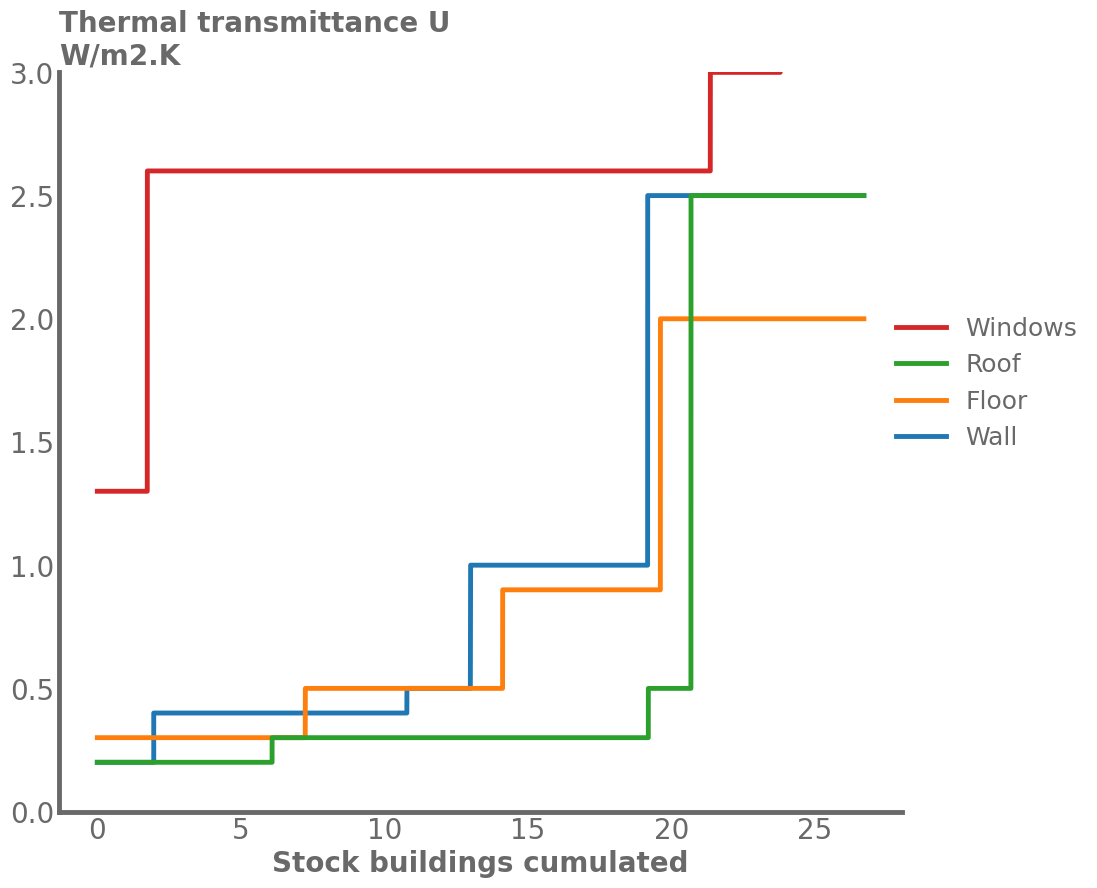

In [23]:
temp = dict()
for i in ['Wall', 'Floor', 'Roof', 'Windows']:
    y = pd.Series(buildings.stock.index.get_level_values(i), index=buildings.stock.index,
                  name='{} insulation (W/m2.K)'.format(i)).astype('float')
    x = buildings.stock / 10 ** 6
    temp.update({i: cumulated_plot(x, y, plot=False)})

cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)